# Maxload in Balls&bins

Here we have the standard balls&bins model, simulated in a straightforward way. 
We plot histogram of the maxload.

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.stats import poisson

In [7]:
%%time
def simulate_max_balls_in_bin(n, num_simulations=1000):
    max_balls = []

    for _ in range(num_simulations):
        bins = [0] * n
        for _ in range(n):
            bins[random.randint(0, n - 1)] += 1
        max_balls.append(max(bins))

    return max_balls
# Example usage
n = 1_000  # Number of balls and bins
num_simulations = 1_000  # Number of times to run the simulation
maxload1 = simulate_max_balls_in_bin(n, num_simulations)
print(f"Average maximum number of balls in a bin (for n = {n}): {np.mean(maxload1)}")

Average maximum number of balls in a bin (for n = 1000): 5.499
CPU times: user 490 ms, sys: 1e+03 ns, total: 490 ms
Wall time: 489 ms


In [3]:
np.log(n)/np.log(np.log(n))

3.574249916581999

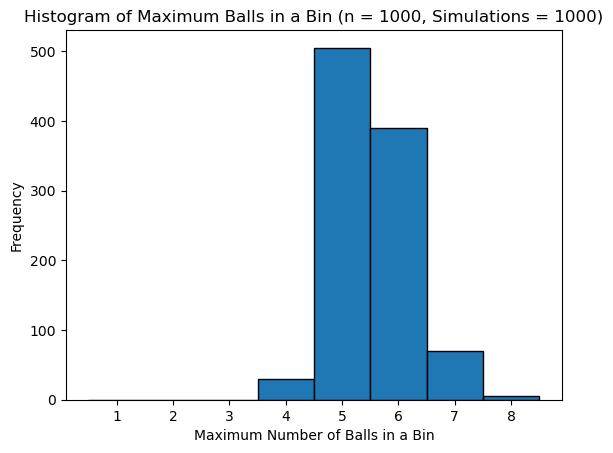

In [4]:
plt.hist(maxload1, bins=range(1, max(maxload1) + 2), align='left', edgecolor='black')
plt.xlabel('Maximum Number of Balls in a Bin')
plt.ylabel('Frequency')
plt.title(f'Histogram of Maximum Balls in a Bin (n = {n}, Simulations = {num_simulations})')
plt.show()

# Poisson simulation

Here we simulate the same proces indirectly: using independent Poisson random variables, $Y_1, \dots, Y_n$, using the notation from the class. 

Then we condition on $\sum_i Y_i = n$. By theorem from class, the distribution of $\vec Y | \sum_i Y_i = n$ 
is the same, as in the exact model, that is the numbers $X_1, \dots, X_n$ (list ```bins``` above). Thus, also the distribution of maxload (maximum of the $Y_i$s) is the same as the distribution of $\max_i X_i$. 


In [11]:
%%time
pois2 = np.random.poisson(lam=1,size=n*num_simulations*100)
y2 = np.resize(pois2,[n,num_simulations*100])
m2 = np.where(np.sum(y2,0)==n, np.max(y2,0), 0)

CPU times: user 4.1 s, sys: 1.16 s, total: 5.27 s
Wall time: 5.26 s


In [12]:
maxload2 = m2[m2!=0]

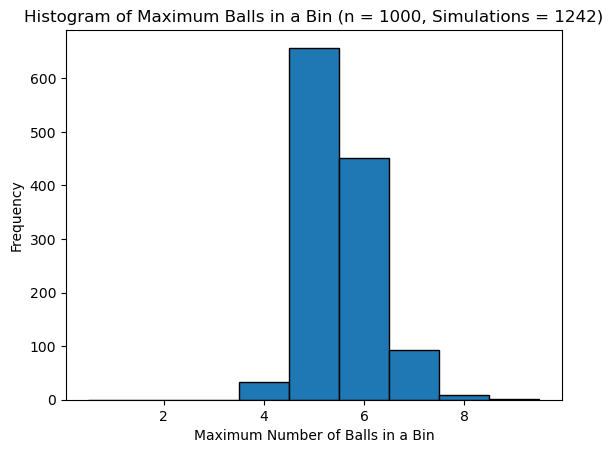

In [13]:
plt.hist(maxload2, bins=range(1, np.max(maxload2) + 2), align='left', edgecolor='black')
plt.xlabel('Maximum Number of Balls in a Bin')
plt.ylabel('Frequency')
plt.title(f'Histogram of Maximum Balls in a Bin (n = {n}, Simulations = {np.size(maxload2)})')
plt.show()

The restriction to the simulations with the proper sum means, we only keep those, where 
$\sum_i Y_i = n$, which happens with probability $P(Pois(1000) = 1000) \doteq 0.012$.
For simplicity we keep all simulations, so we have a bit more that 1000. 

In [14]:
np.size(maxload2)/(num_simulations*100)

0.01242

In [15]:
poisson.pmf(mu=1000,k=1000)

0.01261461134870819

# Poisson approximation

Finally, we do the real approximation: we ignore the conditioning on the proper sum and analyze just the independent Poisson random variables. In the theoretical approach this means easier calculations. In the practical approach a faster time to generate, as we don't throw away the cases with "incorrect number of balls". 

In [16]:
%%time
pois3 = np.random.poisson(lam=1,size=n*num_simulations)
y3 = np.resize(pois3,[n,num_simulations])
maxload3 = np.max(y3,0)

CPU times: user 63.3 ms, sys: 4.53 ms, total: 67.8 ms
Wall time: 66.2 ms


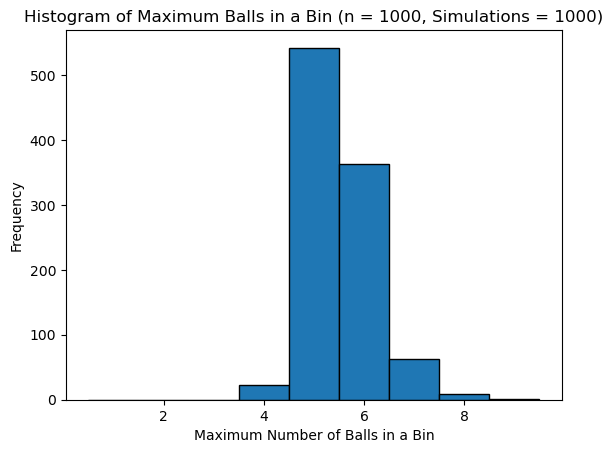

In [17]:
plt.hist(maxload3, bins=range(1, np.max(maxload3) + 2), align='left', edgecolor='black')
plt.xlabel('Maximum Number of Balls in a Bin')
plt.ylabel('Frequency')
plt.title(f'Histogram of Maximum Balls in a Bin (n = {n}, Simulations = {num_simulations})')
plt.show()

# Power of two choices

In [8]:
%%time
def simulate_max_balls_in_bin_two_choices(n, num_simulations=1000):
    max_balls = []

    for _ in range(num_simulations):
        bins = [0] * n
        for _ in range(n):
            a = random.randint(0, n - 1)
            b = random.randint(0, n - 1)
            if bins[a] < bins[b]: bins[a] += 1
            else: bins[b] += 1
        max_balls.append(max(bins))

    return max_balls

CPU times: user 10 µs, sys: 0 ns, total: 10 µs
Wall time: 19.1 µs


In [13]:
%%time
n = 1_000_000  # Number of balls and bins
num_simulations = 100  # Number of times to run the simulation
maxload1 = simulate_max_balls_in_bin(n, num_simulations)
maxload2 = simulate_max_balls_in_bin_two_choices(n, num_simulations)

print(f"Average maximum number of balls in a bin (for n = {n}): {np.mean(maxload1)}")
print(f"Same with two choices: {np.mean(maxload2)}")

Average maximum number of balls in a bin (for n = 1000000): 8.75
Same with two choices: 4.0
CPU times: user 3min 5s, sys: 51.9 ms, total: 3min 5s
Wall time: 3min 5s


In [15]:
np.log(n)/np.log(np.log(n))

5.261464353591485

In [16]:
np.log(np.log(n))

2.625791914476011

In [9]:
%%time
n = 1_000_000  # Number of balls and bins
num_simulations = 100  # Number of times to run the simulation
maxload1 = simulate_max_balls_in_bin(n, num_simulations)
maxload2 = simulate_max_balls_in_bin_two_choices(n, num_simulations)

print(f"Average maximum number of balls in a bin (for n = {n}): {np.mean(maxload1)}")
print(f"Same with two choices: {np.mean(maxload2)}")

Average maximum number of balls in a bin (for n = 1000000): 8.83
Same with two choices: 4.0
CPU times: user 3min 34s, sys: 52.9 ms, total: 3min 34s
Wall time: 3min 34s


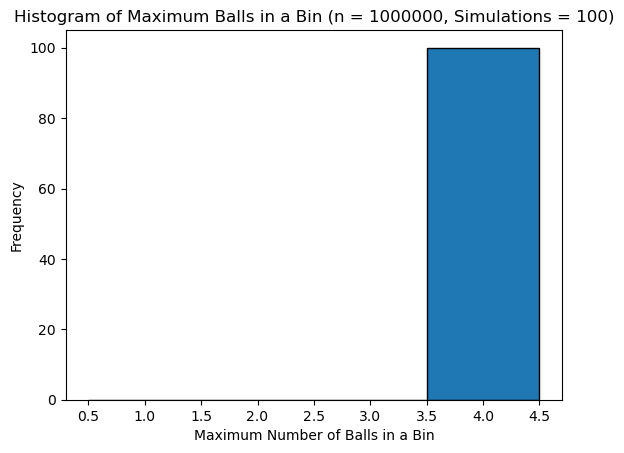

In [10]:
plt.hist(maxload2, bins=range(1, max(maxload2) + 2), align='left', edgecolor='black')
plt.xlabel('Maximum Number of Balls in a Bin')
plt.ylabel('Frequency')
plt.title(f'Histogram of Maximum Balls in a Bin (n = {n}, Simulations = {num_simulations})')
plt.show()

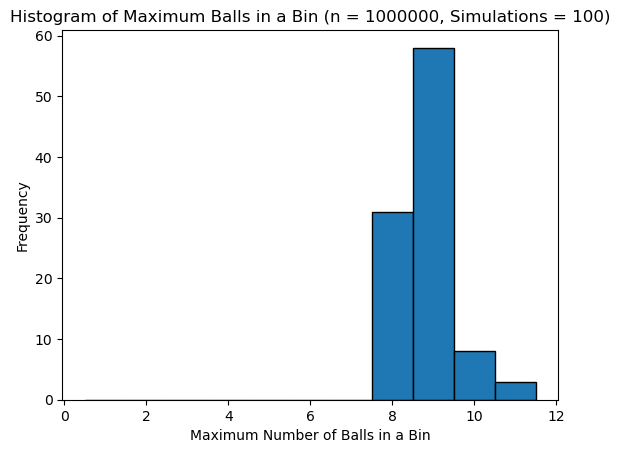

In [12]:
plt.hist(maxload1, bins=range(1, max(maxload1) + 2), align='left', edgecolor='black')
plt.xlabel('Maximum Number of Balls in a Bin')
plt.ylabel('Frequency')
plt.title(f'Histogram of Maximum Balls in a Bin (n = {n}, Simulations = {num_simulations})')
plt.show()